In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle

# Import

In [2]:
dataset = "airfoil_self_noise.dat"

In [3]:
def wrangle(filepath):
    
    col = ["frequency", "attack-angle", "chord-length", "free-stream-velocity", 
           "suction-side-displacement-thickness", "scaled-sound-pressure"]  
    df = pd.read_csv(filepath, delimiter="\t", header=None, names=col)
    
    return df

In [4]:
df = wrangle(dataset)

# Exploration

In [5]:
print(df.shape)
df.head()

(1503, 6)


,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   attack-angle                         1503 non-null   float64
 2   chord-length                         1503 non-null   float64
 3   free-stream-velocity                 1503 non-null   float64
 4   suction-side-displacement-thickness  1503 non-null   float64
 5   scaled-sound-pressure                1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
df.isnull().sum()

frequency                              0
attack-angle                           0
chord-length                           0
free-stream-velocity                   0
suction-side-displacement-thickness    0
scaled-sound-pressure                  0
dtype: int64

Our dataset has 0️⃣ missing value.

In [8]:
df.corr()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
attack-angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord-length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free-stream-velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
suction-side-displacement-thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
scaled-sound-pressure,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


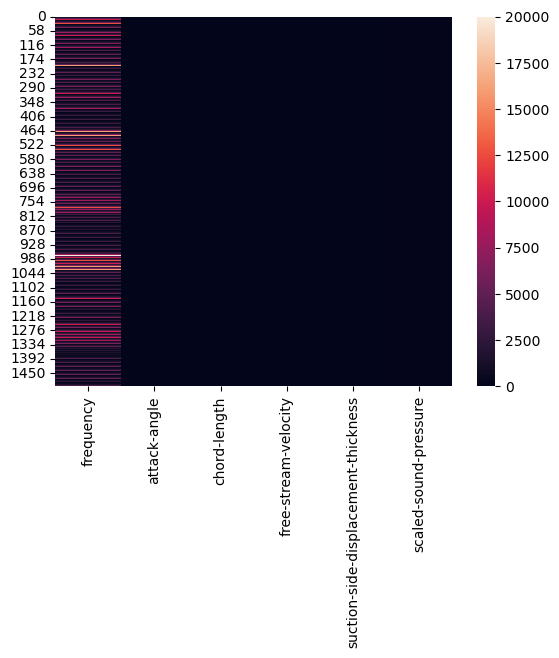

In [9]:
sns.heatmap(df);

The features and target have a `non-linear relationship` with each other. Keeping it in View, we have to use such ML algorithm that works well with non-linear dataset. e.g. **RandomForestRegressor**"

# Split

In [10]:
target = "scaled-sound-pressure"
X = df.drop(columns="scaled-sound-pressure")
y= df[target]

print(X.shape)
print(y.shape)

(1503, 5)
(1503,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

# Baseline

In [12]:
y_mean = y.mean()
y_pred_baseline = [y_mean] * len(y)

print("Baseline MAE:", mean_absolute_error(y, y_pred_baseline))

Baseline MAE: 5.634023844969185


# Iterate

In [13]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

In [14]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [15]:
y_prediction = model.predict(X_test)

# Evaluation

In [16]:
acc_MAE = mean_absolute_error(y_test, y_prediction)
print("Validation MAE:", acc_MAE)

Validation MAE: 1.3138023255813964


Our model has `beat` the **baseline**. 🥳🥳🎉

# Communicate Result

In [17]:
features = X.columns

importance = model.named_steps["randomforestregressor"].feature_importances_

feat_imp = pd.Series(importance, index=features).sort_values()

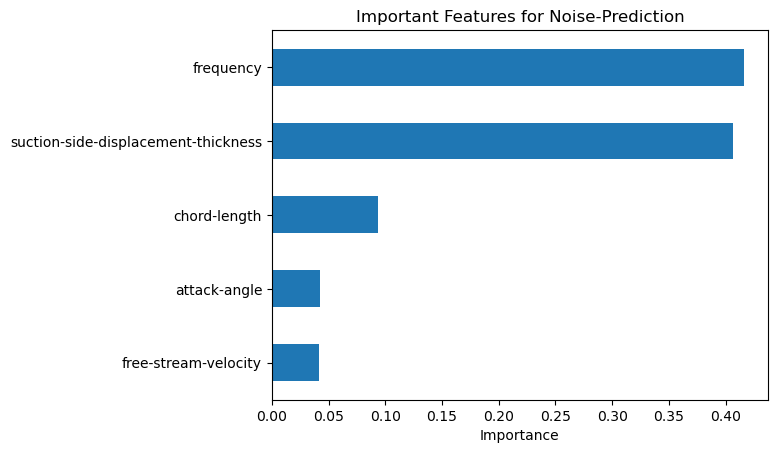

In [18]:
feat_imp.tail().plot(kind="barh")
plt.title("Important Features for Noise-Prediction")
plt.xlabel("Importance");

In [19]:
#creating a fucntion file for future use and model sharing
with open("RFRegressor_model.pkl", "wb") as f:
    pickle.dump(model, f)